In [1]:
pip install requests pandas


In [2]:
import requests
import pandas as pd

# Subgraph endpoint
url = "https://gateway.thegraph.com/api/subgraphs/id/DZz4kDTdmzWLWsV373w2bSmoar3umKKH9y82SUKr5qmp"
API_KEY = "" # insert here in "" inverted commas

# Set up headers with auth
headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

# Query for graphNetworks and graphAccounts
query = """
{
  graphNetworks(first: 5) {
    id
    controller
    graphToken
    epochManager
  }
  graphAccounts(first: 5) {
    id
    createdAt
    defaultName {
      id
    }
    names {
      id
    }
  }
}
"""

# Run request
response = requests.post(url, json={"query": query}, headers=headers)
print("Status code:", response.status_code)
print("Response preview:", response.text[:300])

# Parse data
try:
    data = response.json()
    networks = data["data"]["graphNetworks"]
    accounts = data["data"]["graphAccounts"]

    print("\nGraph Networks:")
    display(pd.DataFrame(networks))

    print("\nGraph Accounts:")
    display(pd.DataFrame(accounts))

except Exception as e:
    print("Error parsing response:", e)


Status code: 200
Response preview: {"data":{"graphAccounts":[{"createdAt":1669815531,"defaultName":null,"id":"0x0000000000000000000000000000000000000000","names":[]},{"createdAt":1721807522,"defaultName":null,"id":"0x0000000000000000000000000000000000000001","names":[]},{"createdAt":1741172899,"defaultName":null,"id":"0x0000000000001

Graph Networks:


,controller,epochManager,graphToken,id
0,0x0a8491544221dd212964fbb96487467291b2c97e,0x5a843145c43d328b9bb7a4401d94918f131bb281,0x9623063377ad1b27544c965ccd7342f7ea7e88c7,1



Graph Accounts:


,createdAt,defaultName,id,names
0,1669815531,None,0x0000000000000000000000000000000000000000,[]
1,1721807522,None,0x0000000000000000000000000000000000000001,[]
2,1741172899,None,0x0000000000001ff3684f28c67538d4d072c22734,[]
3,1741261995,None,0x000000000000e59fc57340cd50d1b12221601b87,[]
4,1712262128,None,0x00000000000ba9cd9f5175108141a82b6c24d727,[]


In [3]:
df_accounts = pd.DataFrame(accounts)
df_accounts["createdAt"] = pd.to_datetime(df_accounts["createdAt"], unit="s")
display(df_accounts)


,createdAt,defaultName,id,names
0,2022-11-30 13:38:51,None,0x0000000000000000000000000000000000000000,[]
1,2024-07-24 07:52:02,None,0x0000000000000000000000000000000000000001,[]
2,2025-03-05 11:08:19,None,0x0000000000001ff3684f28c67538d4d072c22734,[]
3,2025-03-06 11:53:15,None,0x000000000000e59fc57340cd50d1b12221601b87,[]
4,2024-04-04 20:22:08,None,0x00000000000ba9cd9f5175108141a82b6c24d727,[]


In [4]:
df_accounts.to_csv("graph_accounts.csv", index=False)


In [ ]:
from datetime import datetime

# Let's say you saved the 'accounts' data to CSV
accounts_df = pd.DataFrame(accounts)

# Convert createdAt (Unix timestamp) to datetime
accounts_df['createdAt'] = pd.to_datetime(accounts_df['createdAt'], unit='s')

# Save it as a CSV
accounts_df.to_csv("graph_accounts_clean.csv", index=False)

# Similarly for networks if needed:
networks_df = pd.DataFrame(networks)
networks_df.to_csv("graph_networks.csv", index=False)


In [5]:
from google.colab import files
files.download("graph_accounts.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
pip install openai==0.28

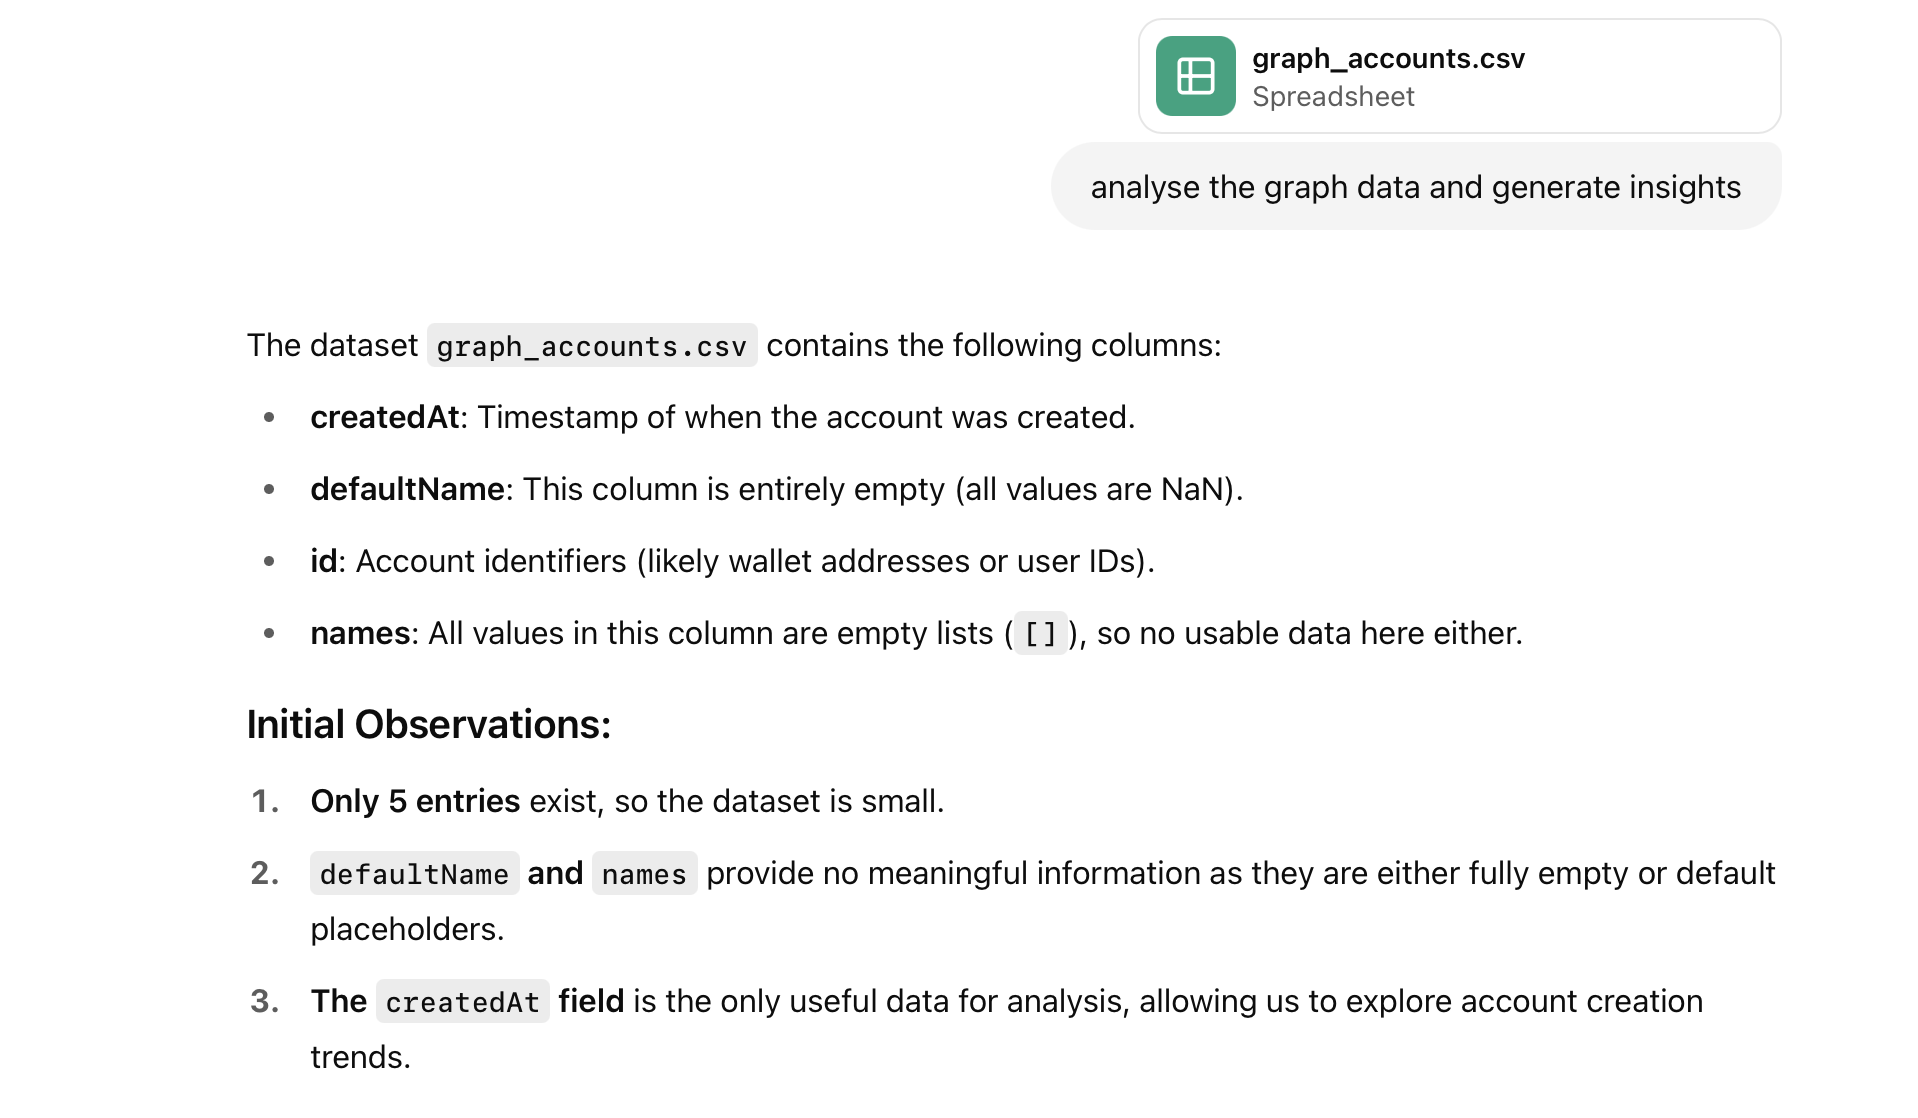

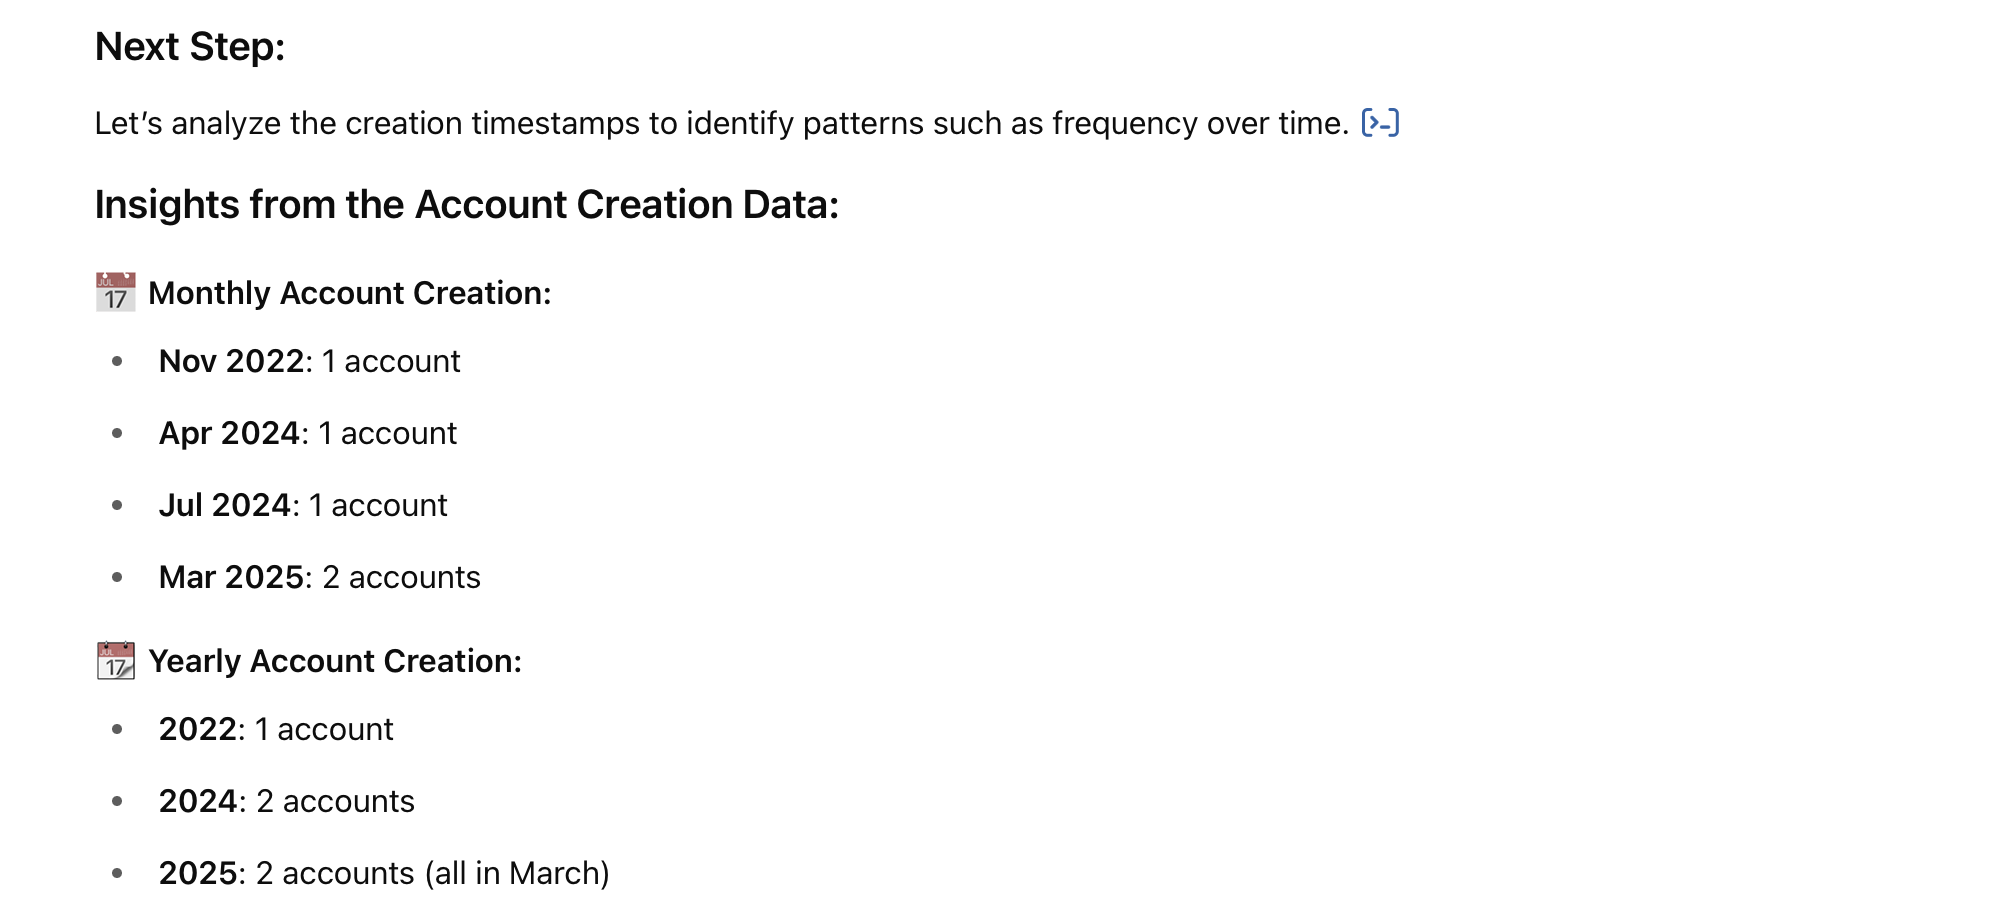

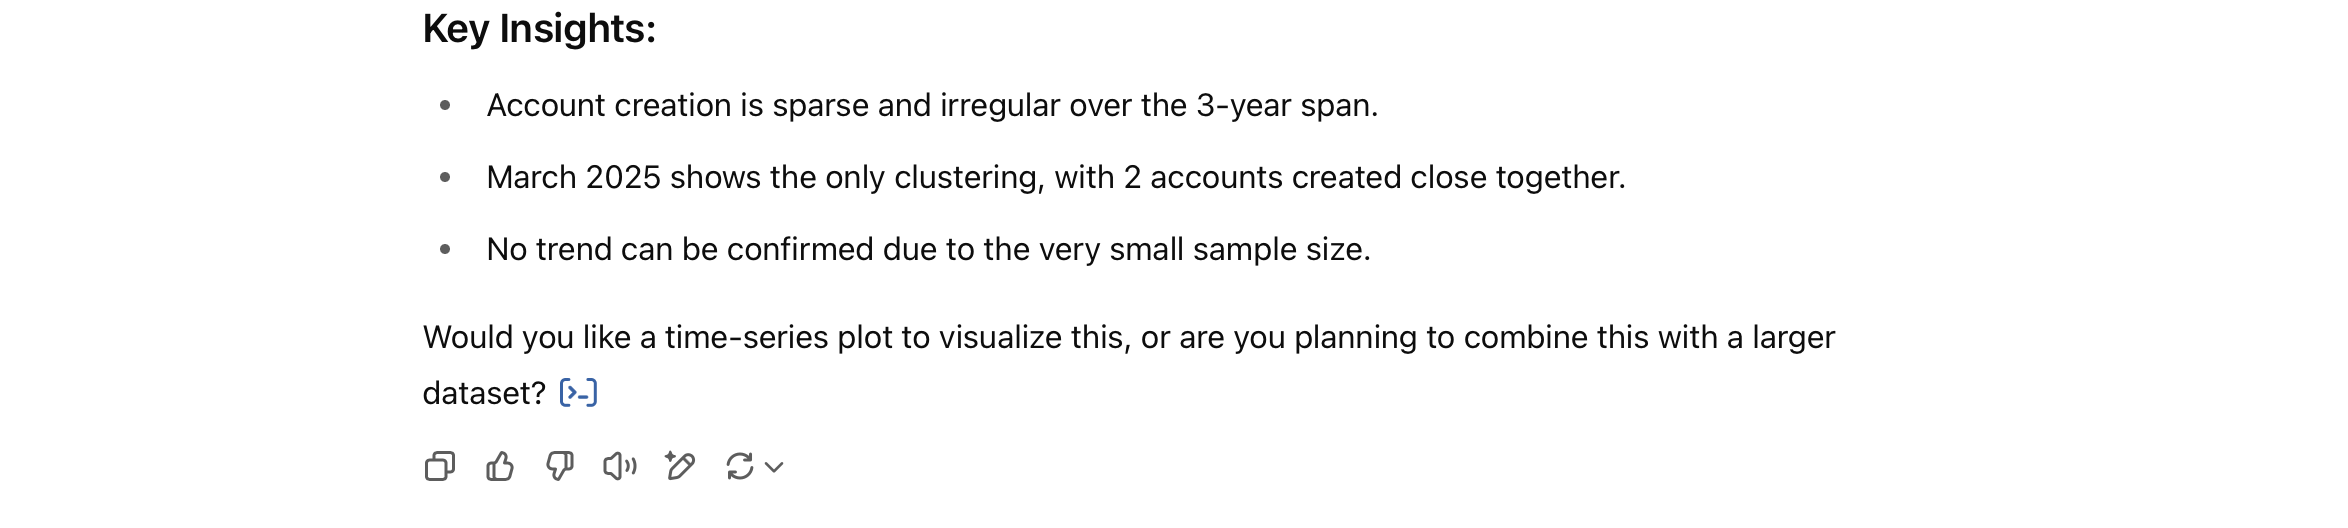